<a href="https://colab.research.google.com/github/IPablo271/Data-science/blob/main/Lab6Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este caso de estudio servirá para demostrar el uso del paquete AutoGluon que permite llevar a cabo un prototipado rápido de moodelos de Aprendizaje de Máquina (ML)

## IMPORTAR LIBRERIAS Y CONJUNTO DE DATOS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Para que funcione Autogluon en Google Colab, es necesario instalar ipkernel y reiniciar el Notebook
# El kernel IPython es el backend de ejecución para Jupyter

!pip install -U ipykernel

In [4]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/2e/42/f26592ecf3dc4e4edcbc5f7f7e3deba25b0681fad2ad04a82d12af17e3a4/autogluon-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.core[all]==0.8.2 from https://files.pythonhosted.org/packages/e0/56/545adb1d388e78591cd7e36de0c8b889c1944de362bdaeec0f31d01890df/autogluon.core-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.features==0.8.2 from https://files.pythonhosted.org/packages/bb/ea/7892719f78a30aee1bf42c4a0540fbae98bfbdf56b85fab79ffc437eb687/autogluon.features-0.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.tabular[all]==0.8.2 from https://files.pythonhosted

In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

El AutoGluon esta modularizado en sub-módulos para datos:  
* Tabular,
* text,
* Images

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
seguros = pd.read_csv('insurance.csv')

In [7]:
seguros

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**PRACTICA #1 [OPCIONAL]:**
- **¿Cuántas regiones únicas hay en el DataFrame seguros?**

## REALIZAR UN ANALISIS EXPLORATORIO DE DATOS (EDA)

In [8]:
# Explorar las primeras 3 filas del DataFrame

seguros.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [9]:
# Explorar las últimas 5 filas del DataFrame

seguros.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
# Generar un resúmen estadístico

seguros.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Obtener información del conjunto de datos

seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# Agrupar por región para ver si hay alguna relación entre region y charges
# Parece ser que la región south east tiene los cargos y los índices de masa corporal más altos

df_region = seguros.groupby('region').describe()
df_region

age                                                         bmi  \
           count       mean        std   min    25%   50%   75%   max  count   
region                                                                         
northeast  324.0  39.268519  14.069007  18.0  27.00  39.5  51.0  64.0  324.0   
northwest  325.0  39.196923  14.051646  19.0  26.00  39.0  51.0  64.0  325.0   
southeast  364.0  38.939560  14.164585  18.0  26.75  39.0  51.0  64.0  364.0   
southwest  325.0  39.455385  13.959886  19.0  27.00  39.0  51.0  64.0  325.0   

                      ... children      charges                              \
                mean  ...      75%  max   count          mean           std   
region                ...                                                     
northeast  29.173503  ...      2.0  5.0   324.0  13406.384516  11255.803066   
northwest  29.199785  ...      2.0  5.0   325.0  12417.575374  11072.276928   
southeast  33.355989  ...      2.0  5.0   364.0  14735.411438  13971.098589   
southwest  30.596615  ...      2.0  5.0   325.0  12346.937377  11557.179101   

                                                                          
                 min          25%           50%         75%          max  
region                                                                    
northeast  1694.7964  5194.322288  10057.652025  16687.3641  58571.07448  
northwest  1621.3402  4719.736550   8965.795750  14711.7438  60021.39897  
southeast  1121.8739  4440.886200   9294.131950  19526.2869  63770.42801  
southwest  1241.5650  4751.070000   8798.593000  13462.5200  52590.82939  

[4 rows x 32 columns]

**PRACTICA #2 [OPCIONAL]:**
- **Agrupe los datos por 'age' y examine la relación entre 'age' y 'charges'**

## REALIZAR UNA VISUALIZACION DE LOS DATOS

<Axes: >

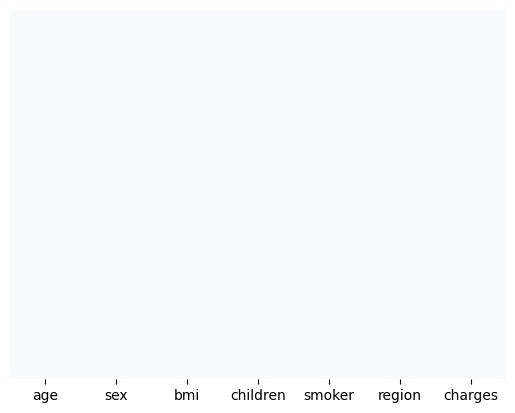

In [13]:
# Ver si hay valores nulos "NULL"

sns.heatmap(seguros.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [14]:
# Ver si hay valores nulos "NULL"

seguros.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

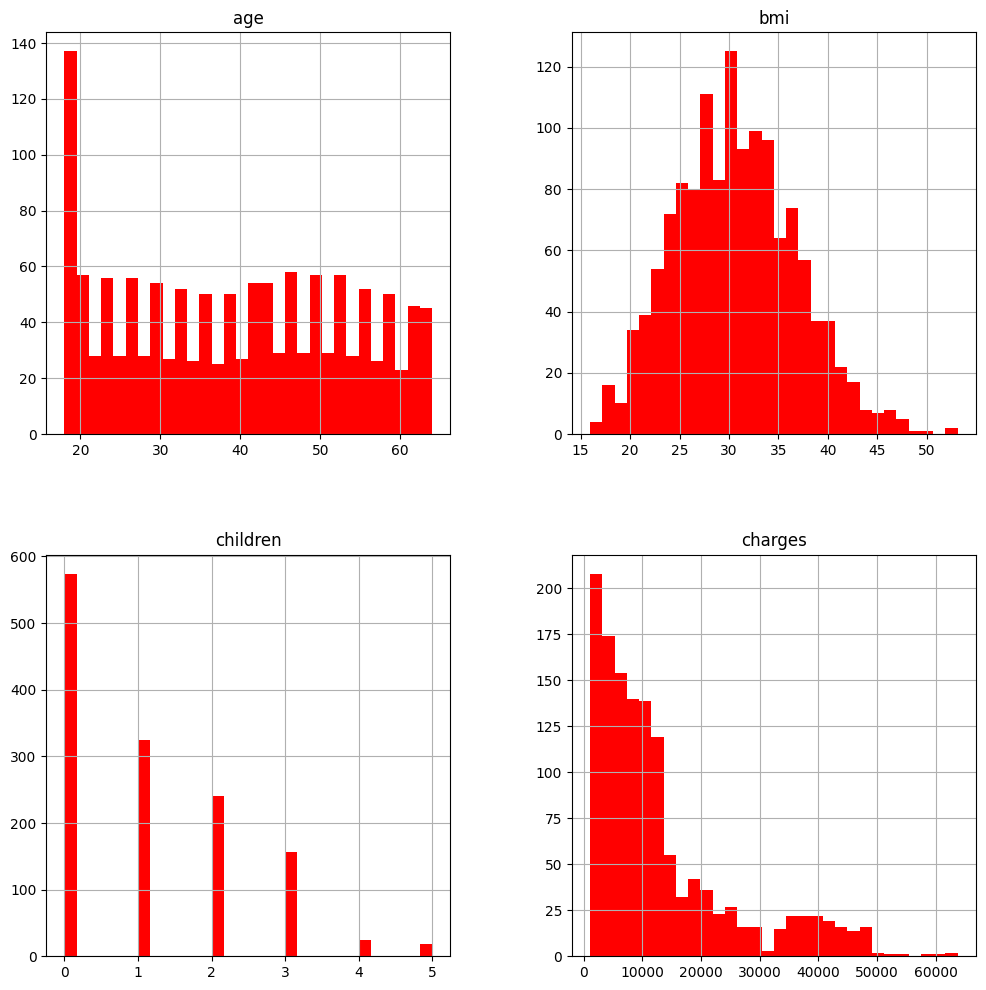

In [15]:
seguros[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


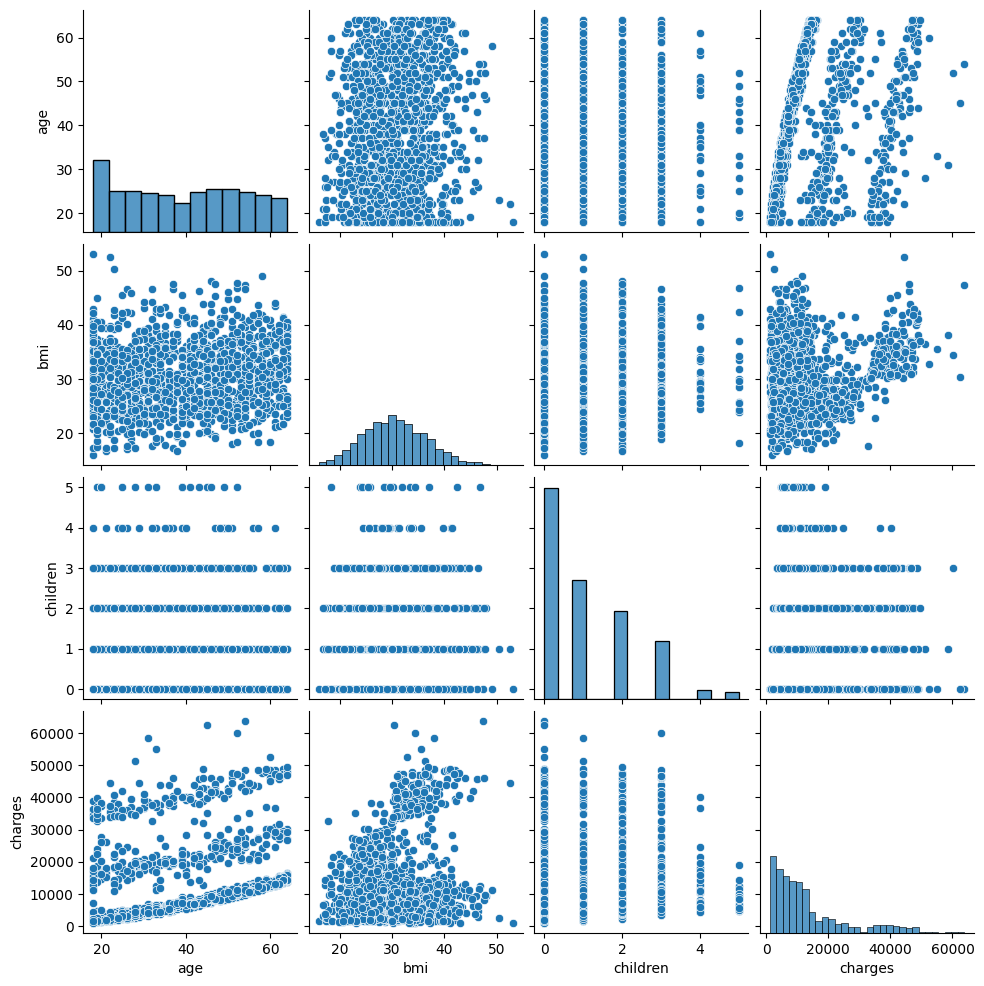

In [16]:
# realizar una gráfica pairplot

sns.pairplot(seguros)

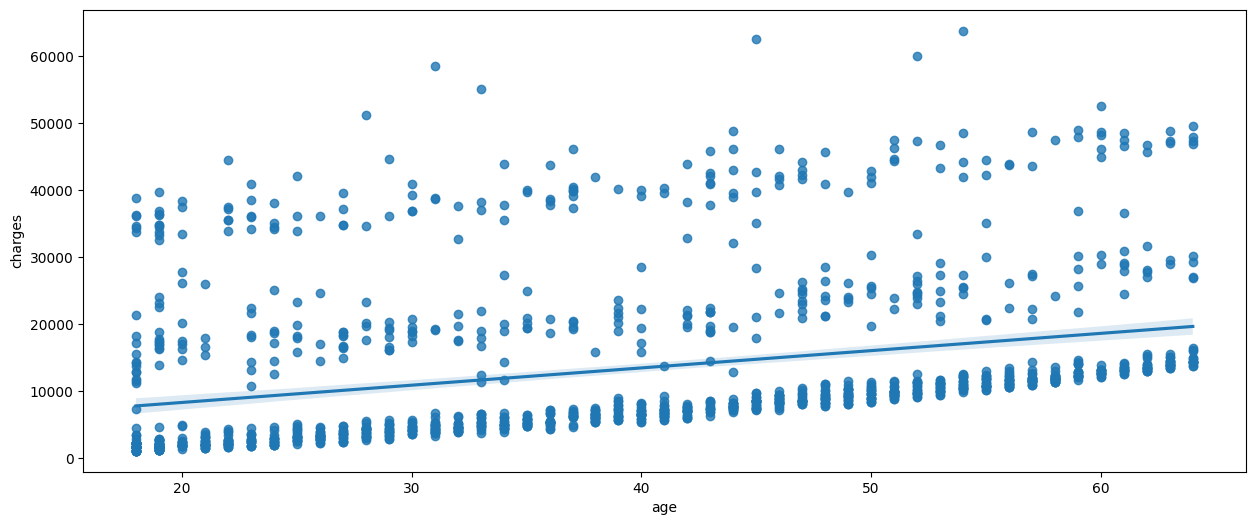

In [17]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = seguros)
plt.show()


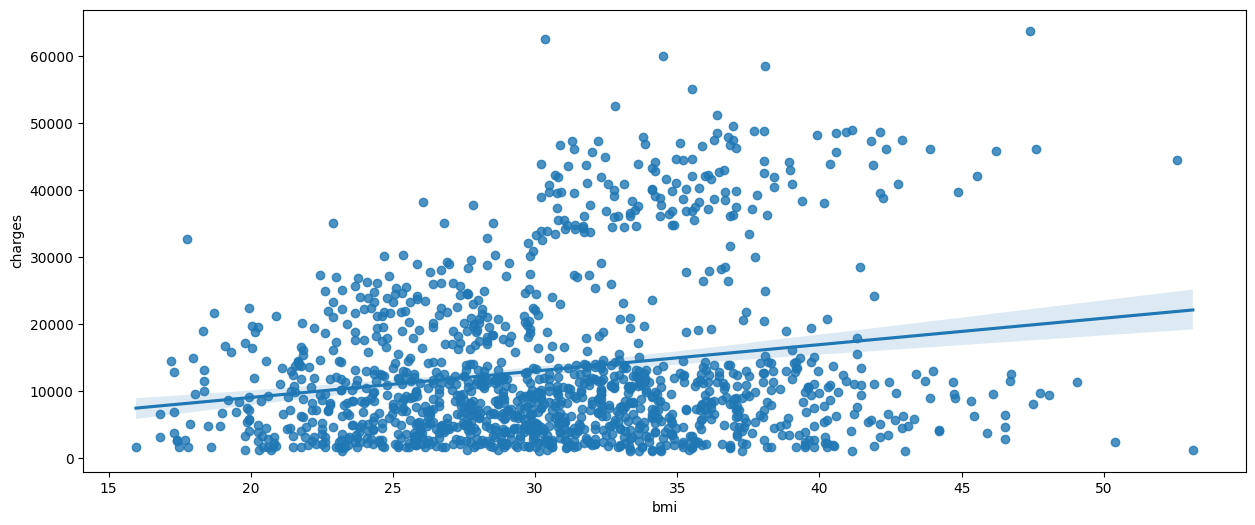

In [18]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = seguros)
plt.show()


**PRACTICA #3 [OPCIONAL]:**
 - **Calcule y grafique la matriz de correlación**
 - **¿Qué "feature" tiene la correlación más positiva con charges?**

## ENTRENAR MULTIPLES MODELOS UTILANDO AUTOGLUON

In [19]:
# Dividir los datos en un 80% para entrenamiento y 20% para pruebas

from sklearn.model_selection import train_test_split
X_entreno, X_prueba = train_test_split(seguros, test_size=0.2, random_state=0)

In [20]:
X_entreno

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [21]:
X_prueba

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


Se entrenarán múltiples modelos ML de regresión utilizando AutoGluon

Es necesario especifcar la columna "etiqueta/meta/", datos de entreno, límite de tiempo, y pre-determinados

Nótese que AutoGluon detecta automáticamente si el problema es de clasificación o regresión basado en la columna "etiqueta"

Para problemas de tipo regresión, los valores de "etiqueta" son generalmente números de punto flotante con un gran número de valores únicos

In [22]:
predictor = TabularPredictor(label="charges",
                             problem_type = 'regression',
                             eval_metric = 'r2').fit(train_data = X_entreno,
                                                     time_limit = 200,
                                                     presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231011_012159/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20231011_012159/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   82.43 GB / 115.66 GB (71.3%)
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11763.84 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gene

In [23]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849948       1.999956  167.660774                0.000997           0.152974            3       True         13
1      WeightedEnsemble_L2   0.848626       0.463179   88.580455                0.001624           1.670852            2       True         10
2        LightGBMXT_BAG_L2   0.848534       1.887795  141.193760                1.225181          35.280863            2       True         11
3          CatBoost_BAG_L1   0.846672       0.026790   16.006304                0.026790          16.006304            1       True          6
4          LightGBM_BAG_L2   0.841533       0.773778  132.226937                0.111164          26.314039            2       True         12
5        LightGBMXT_BAG_L1   0.840820       0.065212   18.454003                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestMSE_BAG_L1': 0.8227276280725969,
  'CatBoost_BAG_L1': 0.8466715382588097,


## EVALUAR EL RENDIMIENTO DE LOS MODELOS ENTRENADOS

In [24]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849948       1.999956  167.660774                0.000997           0.152974            3       True         13
1      WeightedEnsemble_L2   0.848626       0.463179   88.580455                0.001624           1.670852            2       True         10
2        LightGBMXT_BAG_L2   0.848534       1.887795  141.193760                1.225181          35.280863            2       True         11
3          CatBoost_BAG_L1   0.846672       0.026790   16.006304                0.026790          16.006304            1       True          6
4          LightGBM_BAG_L2   0.841533       0.773778  132.226937                0.111164          26.314039            2       True         12
5        LightGBMXT_BAG_L1   0.840820       0.065212   18.454003                0.065212          18.454003            1       True          3

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.849948,1.999956,167.660774,0.000997,0.152974,3,True,13
1,WeightedEnsemble_L2,0.848626,0.463179,88.580455,0.001624,1.670852,2,True,10
2,LightGBMXT_BAG_L2,0.848534,1.887795,141.193760,1.225181,35.280863,2,True,11
3,CatBoost_BAG_L1,0.846672,0.026790,16.006304,0.026790,16.006304,1,True,6
4,LightGBM_BAG_L2,0.841533,0.773778,132.226937,0.111164,26.314039,2,True,12
5,LightGBMXT_BAG_L1,0.840820,0.065212,18.454003,0.065212,18.454003,1,True,3
6,LightGBM_BAG_L1,0.839615,0.045284,18.203859,0.045284,18.203859,1,True,4
7,NeuralNetFastAI_BAG_L1,0.836423,0.154454,36.273895,0.154454,36.273895,1,True,8
8,XGBoost_BAG_L1,0.833380,0.096544,15.600176,0.096544,15.600176,1,True,9
9,RandomForestMSE_BAG_L1,0.822728,0.138484,0.825369,0.138484,0.825369,1,True,5


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849948       1.999956  167.660774                0.000997           0.152974            3       True         13
1      WeightedEnsemble_L2   0.848626       0.463179   88.580455                0.001624           1.670852            2       True         10
2        LightGBMXT_BAG_L2   0.848534       1.887795  141.193760                1.225181          35.280863            2       True         11
3          CatBoost_BAG_L1   0.846672       0.026790   16.006304                0.026790          16.006304            1       True          6
4          LightGBM_BAG_L2   0.841533       0.773778  132.226937                0.111164          26.314039            2       True         12
5        LightGBMXT_BAG_L1   0.840820       0.065212   18.454003                0.065212          18.454003            1       True          3

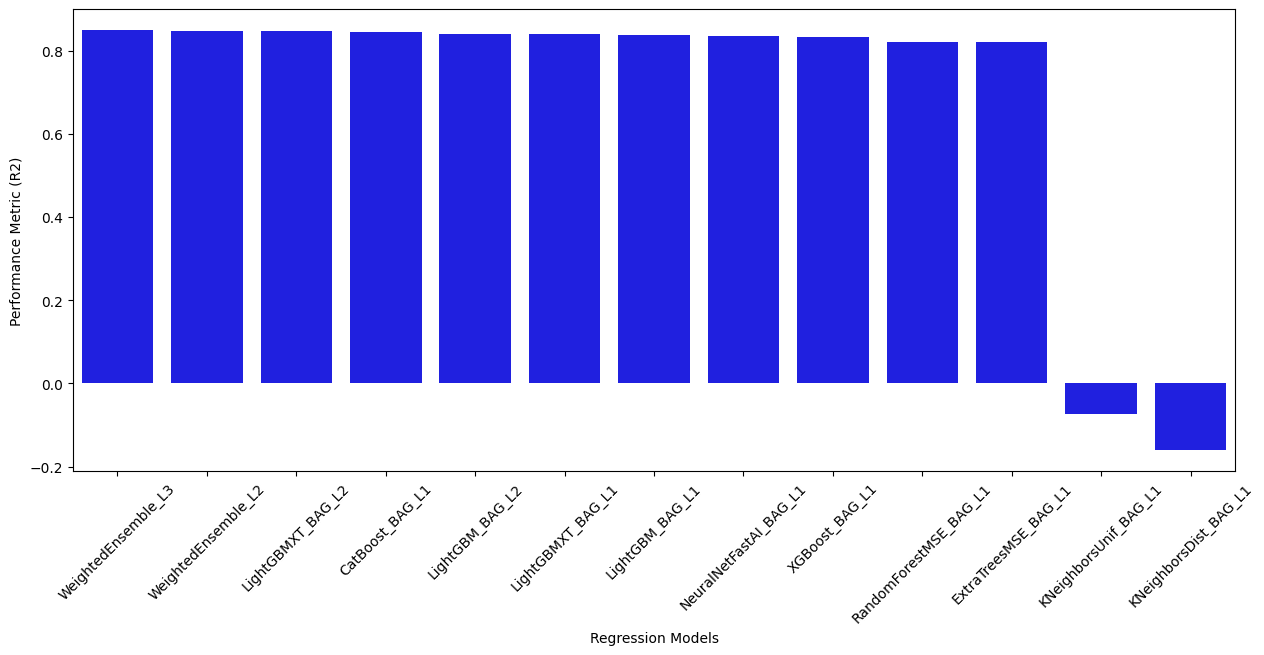

In [25]:
# Inicializar la figura de matplotlib

f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [26]:
predictor.evaluate(X_prueba)

Evaluation: r2 on test data: 0.9013573456897499
Evaluations on test data:
{
    "r2": 0.9013573456897499,
    "root_mean_squared_error": -3961.9442025026756,
    "mean_squared_error": -15697001.86374456,
    "mean_absolute_error": -2449.4813100268775,
    "pearsonr": 0.9499941055390653,
    "median_absolute_error": -1780.565909960937
}


{'r2': 0.9013573456897499,
 'root_mean_squared_error': -3961.9442025026756,
 'mean_squared_error': -15697001.86374456,
 'mean_absolute_error': -2449.4813100268775,
 'pearsonr': 0.9499941055390653,
 'median_absolute_error': -1780.565909960937}

In [27]:
# Evaluar el rendimiento de los modelos
# Seleccionar 5 observaciones del conjunto de datos de prueba y generar las predicciones

y_pred = predictor.predict(X_prueba)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [12282.7392578125, 10921.818359375, 44635.1171875, 13191.8916015625, 11489.5595703125]


In [28]:
X_prueba

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [29]:
y_prueba = X_prueba['charges']
y_prueba # valores correctos

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'Valores reales')

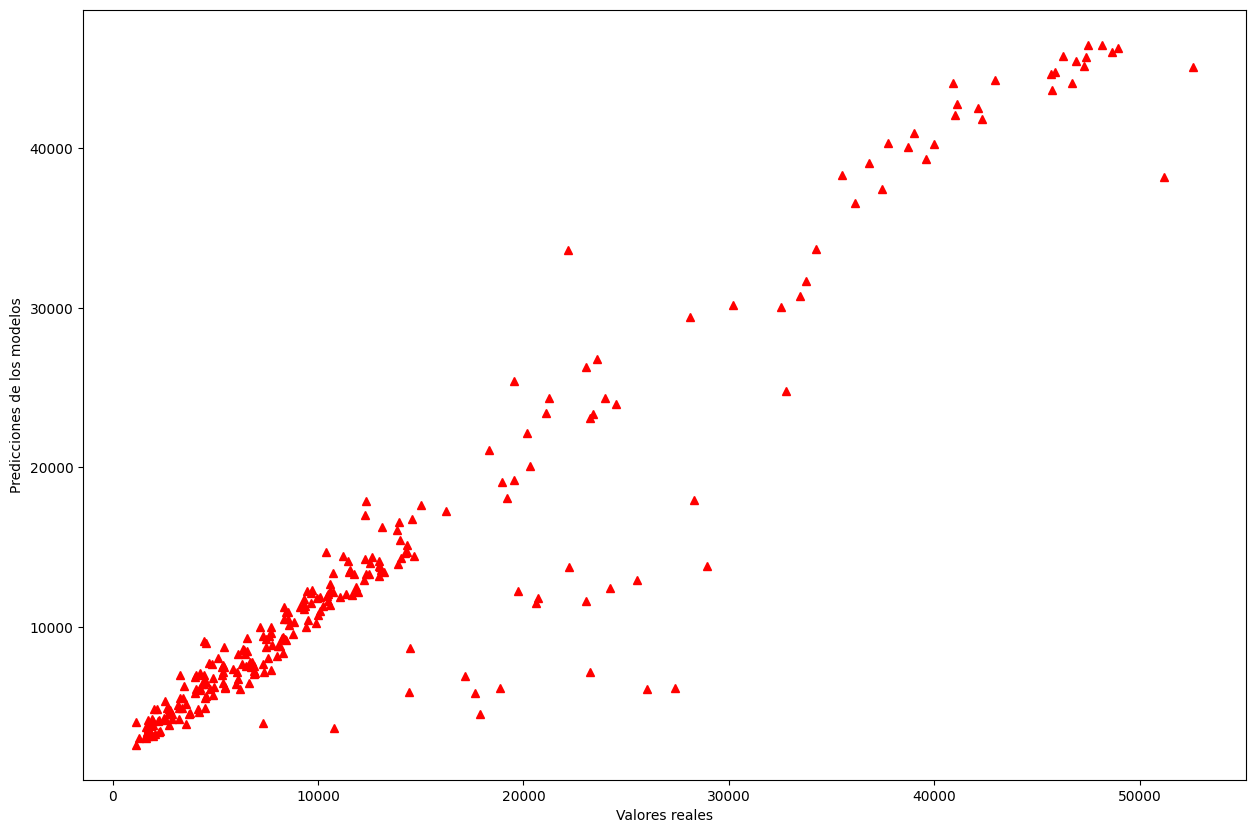

In [30]:
y_predicc = predictor.predict(X_prueba)
plt.figure(figsize = (15, 10))
plt.plot(y_prueba, y_predicc, "^", color = 'r')
plt.ylabel('Predicciones de los modelos')
plt.xlabel('Valores reales')

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_prueba, y_predicc)),'.3f'))
MSE = mean_squared_error(y_prueba, y_predicc)
MAE = mean_absolute_error(y_prueba, y_predicc)
r2 = r2_score(y_prueba, y_predicc)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 3961.944 
MSE = 15697001.86374456 
MAE = 2449.4813100268775 
R2 = 0.9013573456897499


**PRACTICA #4 [OPCIONAL]:**

- **Volver a en\ntrenar un modelo de regresión usando AutoGluon con valores pre-determinados diferentes**
- **Fijar el límite de tiempo a 300 secs**
- **Utilizar RMSE como la métrica principal y realice una gráfica de barras**
- **¿Qué modelo tiene el mejor rendimiento?**
- **Evaluar el rendimiento de los modelos entrenados por medio de la comparación de distintas métricas**

# ¡FABULOSO!